In [116]:
model_filepath = "model/brainTumorMRIClassificationModel-v1.keras"

In [117]:
import os
print(os.getcwd())

/workspaces/Brain-tumor-Prediction-CNN/notebooks


In [118]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model(r'../model/brainTumorMRIClassificationModel-v1.keras')

# Now you can use the loaded model for prediction or further training
# For example, to make predictions:
# predictions = model.predict(your_input_data)

# To see the model summary (architecture, layers, parameters):
model.summary()

# If the original model was compiled, the loaded model will also be compiled
# and you can continue training it if needed:
# model.fit(new_training_data, new_training_labels, epochs=...)

# To evaluate the model:
# loss, accuracy = model.evaluate(test_data, test_labels)
# print(f"Loss: {loss}, Accuracy: {accuracy}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 127, 127, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 127, 127, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 31, 31, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,016,366 (11.51 MB)

 Trainable params: 1,005,156 (3.83 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2,010,314 (7.67 MB)

In [119]:
model.input_shape

(None, 256, 256, 3)

In [120]:
import numpy as np
from PIL import Image

In [121]:
with open(r"../model_dataset_lalel.txt", "r") as f:
    file = f.read()

model_class_label = []
for txt in file.split(","):
    model_class_label.append(txt)

print(model_class_label)

['glioma', 'meningioma', 'notumor', 'pituitary']


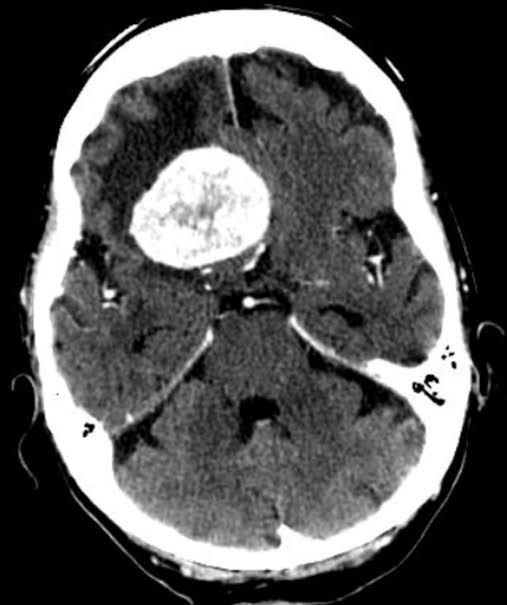

In [ ]:
from PIL import Image

img = Image.open("../datasets/testing_images/Te-me_0015.jpg")
img

In [123]:
# 4. Convert the PIL Image to a NumPy array
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
# Example: Simple normalization to [0, 1]
img_array = img_array / 255.0

In [124]:
img_array.shape

(1, 605, 507, 3)

In [125]:
import tensorflow as tf
import numpy as np


# Define the target height and width from your model's input shape
target_height = 256
target_width = 256

# Bilinear is a good default for images.
resized_image = tf.image.resize(
    img_array,
    size=[target_height, target_width],
    method=tf.image.ResizeMethod.BILINEAR # Or other methods like BICUBIC, NEAREST_NEIGHBOR
)

print(f"Reshaped image shape: {resized_image.shape}")

Reshaped image shape: (1, 256, 256, 3)


In [126]:
output = model.predict(resized_image)
pred_index = np.argmax(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


In [129]:
prediction = model_class_label[pred_index]
print(prediction)

meningioma


In [142]:
img_path = "../datasets/testing_images"


In [ ]:
import os
for imgs in os.listdir(img_path):


['Te-me_0016.jpg',
 'Te-pi_0021.jpg',
 'Te-me_0015.jpg',
 'Te-gl_0011.jpg',
 'Te-no_0019.jpg',
 'Te-no_0021.jpg',
 'Te-gl_0012.jpg',
 'Te-pi_0020.jpg']